In [4]:
import numpy as np
training_data = np.loadtxt('Dbig.txt')
training_data = np.random.permutation(training_data)
sliceObj_test = slice(8192,10000)
test_data = training_data[sliceObj_test]
sliceObj_D32 = slice(0,32)
training_data_D32 = training_data[sliceObj_D32]
sliceObj_D128 = slice(0,128)
training_data_D128 = training_data[sliceObj_D128]
sliceObj_D512 = slice(0,512)
training_data_D512 = training_data[sliceObj_D512]
sliceObj_D2048 = slice(0,2048)
training_data_D2048 = training_data[sliceObj_D2048]
sliceObj_D8192 = slice(0,8192)
training_data_D8192 = training_data[sliceObj_D8192]
training_data = test_data
np.savetxt('Dbig_test.txt',training_data,fmt='%f')


In [6]:
header = ["Feature1", "Feature2", "Label"]

In [5]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [9]:
def candidates(training_data):

    # FOR FEATURE 1
    feat1_sort = sorted(np.asarray(training_data), key=lambda x: x[0])
    feat1_sort = np.asarray(feat1_sort)
    feat1_sort_split = np.split(feat1_sort, np.where(np.diff(feat1_sort[:,0]))[0]+1)
    C1 = []
    n = len(feat1_sort_split)
    for i in range(0,n-1):
        j = i + 1
        split_mat_1st = np.asmatrix(feat1_sort_split[i])
        print(split_mat_1st)
        split_mat_2nd = np.asmatrix(feat1_sort_split[j])
        print(split_mat_2nd)
        m = len(split_mat_1st)
        p = len(split_mat_2nd)
        #print(m)
        #print(p)
        for h in range(0,m):
            for k in range(0,p):
                if (split_mat_1st[h,2] != split_mat_2nd[k,2]): 
                    print("Candidate found")
                    C1.append(split_mat_2nd[k,0])
                    print(C1)
    print(C1)
    # FOR FEATURE 2
    feat2_sort = sorted(np.asarray(training_data), key=lambda x: x[1])
    feat2_sort = np.asarray(feat2_sort)
    feat2_sort_split = np.split(feat2_sort, np.where(np.diff(feat2_sort[:,1]))[0]+1)
    C2 = []
    n = len(feat2_sort_split)
    for i in range(0,n-1):
        j = i + 1
        split_mat_1st = np.asmatrix(feat2_sort_split[i])
        print(split_mat_1st)
        split_mat_2nd = np.asmatrix(feat2_sort_split[j])
        print(split_mat_2nd)
        m = len(split_mat_1st)
        p = len(split_mat_2nd)
        #print(m)
        #print(p)
        for h in range(0,m):
            for k in range(0,p):
                if (split_mat_1st[h,2] != split_mat_2nd[k,2]): 
                    print("Candidate found")
                    C2.append(split_mat_2nd[k,1])
                    print(C2)
    print(C2)
    return C1,C2

In [7]:
def class_counts(rows):
    counts = {}  
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [10]:
class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        val = example[self.column]
        return val >= self.value

    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [11]:
def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [12]:
import math
def entropy(rows):
    """Calculate the Entropy for a list of rows.
    """
    counts = class_counts(rows)
    total = 0
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        total += - prob_of_lbl * math.log2(prob_of_lbl)
    return total

In [13]:
def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

In [14]:
def find_best_split(rows):    
    print("NEW NODE HERE!")
    
    rows = np.asarray(rows)
    C1,C2 = candidates(rows)
    
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature 
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1  # number of columns
    
 
    col = 0
    values = C1
        
    for val in values:  

        question = Question(col, val)
        true_rows, false_rows = partition(rows, question)
        if len(true_rows) == 0 or len(false_rows) == 0:
            continue
        gain = info_gain(true_rows, false_rows, current_uncertainty)
        
        print("Feature 1 gain")
        print(question)
        print(gain)
        
        if gain >= best_gain:
               best_gain, best_question = gain, question
    
    col = 1
    values = C2
        
    for val in values:  # for each value

        question = Question(col, val)


        true_rows, false_rows = partition(rows, question)

        if len(true_rows) == 0 or len(false_rows) == 0:
              continue

        # Calculate the information gain from this split
        gain = info_gain(true_rows, false_rows, current_uncertainty)

        print("Feature 2 gain")
        print(question)
        print(gain)
        
        if gain >= best_gain:
            best_gain, best_question = gain, question

    return best_gain, best_question

In [15]:
best_gain, best_question = find_best_split(training_data)

Streaming output truncated to the last 5000 lines.
[[-0.411363  0.565553  0.      ]]
[[-1.457909  0.566493  1.      ]]
Candidate found
[-0.926187, -0.925588, -0.90201, -0.900978, -0.880797, -0.879223, -0.856344, -0.853943, -0.847589, -0.845395, -0.836954, -0.836623, -0.810372, -0.806029, -0.805211, -0.800815, -0.788435, -0.786559, -0.785564, -0.785226, -0.781666, -0.78088, -0.78042, -0.77945, -0.764897, -0.764343, -0.760869, -0.760246, -0.730767, -0.726943, -0.725204, -0.724591, -0.710047, -0.708502, -0.70481, -0.701744, -0.693559, -0.692632, -0.686861, -0.685652, -0.685009, -0.681186, -0.677378, -0.677032, -0.674107, -0.668966, -0.654308, -0.652244, -0.651529, -0.651107, -0.637091, -0.636006, -0.632288, -0.629486, -0.625673, -0.625655, -0.618553, -0.615619, -0.611547, -0.611317, -0.604822, -0.587244, -0.584698, -0.57966, -0.5792, -0.576347, -0.57107, -0.569791, -0.562586, -0.562262, -0.555945, -0.554936, -0.55262, -0.5493, -0.549023, -0.547765, -0.541546, -0.534396, -0.512367, -0.5078

In [17]:
class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [16]:
class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [18]:
def build_tree(rows,count_leaf):
    gain, question = find_best_split(rows)

    if gain == 0:
        count_leaf.append([1])
        print("NUMBER OF LEAFS IS: %g" %(len(count_leaf)))
        return Leaf(rows)
    true_rows, false_rows = partition(rows, question)
    true_branch = build_tree(true_rows,count_leaf)
    false_branch = build_tree(false_rows,count_leaf)
    best_col.append(question.column)
    best_val.append(question.value)
    
    return Decision_Node(question, true_branch, false_branch)

In [19]:
def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return
    print (spacing + str(node.question))
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [20]:
best_col = []
best_val = []
count_leaf = []
my_tree = build_tree(training_data,count_leaf)

Streaming output truncated to the last 5000 lines.
[[ 0.839481 -0.800815  1.      ]]
[[ 0.852255 -0.769106  1.      ]]
[[ 0.852255 -0.769106  1.      ]]
[[ 0.853805 -1.212776  1.      ]]
[[ 0.853805 -1.212776  1.      ]]
[[ 0.857435 -1.061171  1.      ]]
[[ 0.857435 -1.061171  1.      ]]
[[ 0.858083 -1.450299  1.      ]]
[[ 0.858083 -1.450299  1.      ]]
[[ 0.865007 -0.731648  1.      ]]
[[ 0.865007 -0.731648  1.      ]]
[[ 0.86845  -1.045225  1.      ]]
[[ 0.86845  -1.045225  1.      ]]
[[ 0.879764 -0.895236  1.      ]]
[[ 0.879764 -0.895236  1.      ]]
[[ 0.882133 -0.974842  1.      ]]
[[ 0.882133 -0.974842  1.      ]]
[[ 0.884951 -0.745936  1.      ]]
[[ 0.884951 -0.745936  1.      ]]
[[ 0.88672 -0.71976  1.     ]]
[[ 0.88672 -0.71976  1.     ]]
[[ 0.898618 -1.477975  1.      ]]
[[ 0.898618 -1.477975  1.      ]]
[[ 0.90779  -1.321971  1.      ]]
[[ 0.90779  -1.321971  1.      ]]
[[ 0.910011 -1.115185  1.      ]]
[[ 0.910011 -1.115185  1.      ]]
[[ 0.91947  -0.734753  1.      ]]
[[ 

In [21]:
print_tree(my_tree)

Is Feature2 >= -0.710047?
--> True:
  Is Feature1 >= 1.028892?
  --> True:
    Is Feature1 >= 1.134701?
    --> True:
      Predict {1.0: 168}
    --> False:
      Is Feature2 >= 0.153104?
      --> True:
        Is Feature2 >= 0.792619?
        --> True:
          Predict {1.0: 16}
        --> False:
          Is Feature2 >= 0.420819?
          --> True:
            Predict {0.0: 7}
          --> False:
            Is Feature2 >= 0.170628?
            --> True:
              Predict {1.0: 2}
            --> False:
              Predict {0.0: 1}
      --> False:
        Predict {1.0: 25}
  --> False:
    Is Feature1 >= -1.09737?
    --> True:
      Is Feature2 >= 1.208118?
      --> True:
        Is Feature2 >= 1.226804?
        --> True:
          Predict {1.0: 117}
        --> False:
          Is Feature1 >= -0.291223?
          --> True:
            Predict {1.0: 4}
          --> False:
            Is Feature2 >= 1.218542?
            --> True:
              Predict {0.0: 2}
       

In [22]:
print(best_col)
print(best_val)
print(len(best_col))
print(count_leaf)
total_nodes = len(best_col) + len(count_leaf)
print(total_nodes)

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[0.170628, 0.420819, 0.792619, 0.153104, 1.134701, 1.218542, -0.291223, 1.226804, 1.205433, 1.083794, 1.116934, 0.186728, 1.188856, -0.764432, -0.180314, -0.863418, 0.887935, 0.150853, 0.988013, 0.934287, 0.591556, -1.082734, -1.07313, 0.022087, -0.919806, 1.060339, -0.282128, 0.747956, 0.812555, -0.418353, -0.654308, -0.648448, -0.665368, -0.637091, -0.443251, -0.484914, -0.421058, -0.556835, 0.524621, -0.28965, -0.297186, -0.724912, -0.24961, 1.208118, -1.124041, -1.124571, -1.09737, 1.028892, -0.009263, 0.128571, -0.856344, -0.175845, 0.334795, -0.926187, -0.710047]
55
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],

In [23]:
def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [24]:
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs,lbl

In [25]:
training_data = test_data

In [26]:
wrong_pred = 0
for row in training_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))
    if row[-1] != print_leaf(classify(row, my_tree))[1]:
        wrong_pred += 1
print(wrong_pred)
print(len(training_data))
errN = wrong_pred/len(training_data)
print("Error N is: %g" %(errN))

Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.0. Predicted: ({0.0: '100%'}, 0.0)
Actual: 1.0. Predicted: ({1.0: '100%'}, 1.0)
Actual: 0.

Text(0.5, 1.0, 'HW2 - Q7 - Dbig with n=8192')

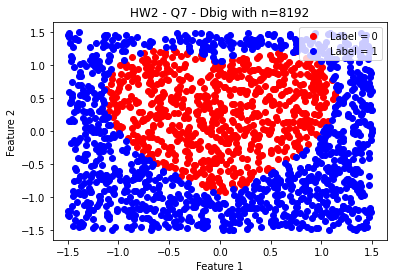

In [27]:
training_data = np.asarray(training_data)
import matplotlib.pyplot as plt
label_sort = sorted(np.asarray(training_data), key=lambda x: x[2])
label_sort = np.asarray(label_sort)

label_sort_split = np.split(label_sort, np.where(np.diff(label_sort[:,2]))[0]+1)

label_sort_split_mat0 = np.asmatrix(label_sort_split[0])
label_sort_split_mat1 = np.asmatrix(label_sort_split[1])

label0 = plt.plot(label_sort_split_mat0[:,0],label_sort_split_mat0[:,1],'ro',label = 'Label = 0')
label1 = plt.plot(label_sort_split_mat1[:,0],label_sort_split_mat1[:,1],'bo',label = 'Label = 1')
plt.legend(loc="upper right")
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.title('HW2 - Q7 - Dbig with n=8192')


Text(0.5, 1.0, 'HW2 - Q7 - n vs error_n')

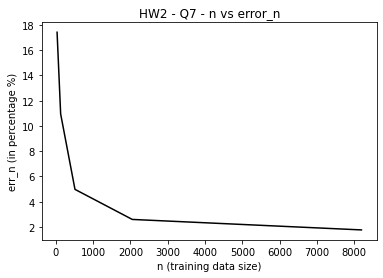

In [28]:
# PLOTTING n vs err_n

import matplotlib.pyplot as plt
nn = [32,128,512,2048,8192]
errorn = [17.42,10.95,4.98,2.60,1.77]
label1 = plt.plot(nn,errorn,'k-')
plt.ylabel('err_n (in percentage %)')
plt.xlabel('n (training data size)')
plt.title('HW2 - Q7 - n vs error_n')
#plt.savefig('HW2_Q7_error.pdf')

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [97]:
nodes = []

In [67]:
total_scores = []

In [143]:
import pandas as pd
df = pd.DataFrame(training_data_D8192,columns = ['Feature_1','Feature_2','label'])
df.head()

,Feature_1,Feature_2,label
0,-0.787068,-0.073104,0.0
1,-0.982698,0.787693,0.0
2,0.259728,1.226015,1.0
3,0.883293,1.394305,1.0
4,0.408322,-0.014239,0.0


In [144]:
from sklearn.metrics import accuracy_score

In [145]:
y_train = df['label']
x_train =  df.loc[ : , df.columns != 'label']

In [146]:
import pandas as pd
df_test = pd.DataFrame(test_data,columns = ['Feature_1','Feature_2','label'])
df_test.head()

,Feature_1,Feature_2,label
0,0.933651,-0.768409,1.0
1,-1.398709,-0.414040,1.0
2,0.927850,0.891211,0.0
3,0.726051,-0.713072,1.0
4,1.463621,-0.334679,1.0


In [147]:
y_test = df_test['label']
x_test = df_test.loc[ : , df.columns != 'label']

In [148]:
clf = DecisionTreeClassifier( random_state = 0)
clf.fit(x_train, y_train)
nodes.append(clf.tree_.node_count)

In [149]:
y_pred = clf.predict(x_test)

In [150]:
val = print(1-accuracy_score(y_test,y_pred))

0.015486725663716783


In [151]:
print(nodes)

[229, 9, 15, 63, 119, 229]


In [ ]:
nn = [32,128,512,2048,8192]
errorn = [14.15,7.79,5.97,3.15,1.54]

Text(0.5, 1.0, 'HW2 - 3 - n vs error_n')

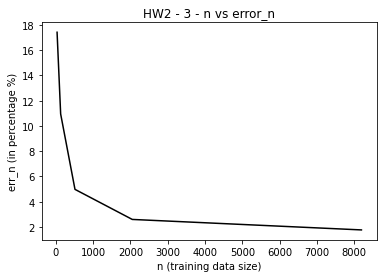

In [105]:
# PLOTTING n vs err_n

import matplotlib.pyplot as plt
nn = [32,128,512,2048,8192]
errorn = [17.42,10.95,4.98,2.60,1.77]
label1 = plt.plot(nn,errorn,'k-')
plt.ylabel('err_n (in percentage %)')
plt.xlabel('n (training data size)')
plt.title('HW2 - 3 - n vs error_n')


In [104]:
nodes

[229]

In [152]:
temp1 = df[0:100]

In [153]:
temp1.shape

(100, 3)

In [173]:

temp = np.random.uniform(0, 10, 100)

In [156]:
temp

array([9.08043556, 3.61658712, 4.10674086, 1.2217804 , 1.11889369,
       8.53718241, 9.68052257, 4.60019529, 2.68037741, 5.75235948,
       2.28352171, 3.82809128, 1.63171776, 0.55479015, 7.36215289,
       7.5305209 , 8.13259836, 5.33457264, 4.4119589 , 0.27067447,
       9.45446382, 7.64724296, 6.46520556, 7.39851791, 3.08427108,
       3.54855941, 4.51502643, 5.34265358, 8.37112331, 7.28406453,
       3.46533224, 3.01159985, 7.58098858, 2.60560359, 7.00734812,
       2.93963413, 8.1245674 , 0.85927547, 5.25085094, 0.34304622,
       7.81520996, 9.95042001, 4.99889971, 3.92703315, 3.79260057,
       4.56066048, 4.95301747, 2.50321981, 2.45976342, 9.5650007 ,
       8.37040875, 0.60755217, 8.08521321, 2.19520345, 6.81512141,
       1.16798984, 2.25361798, 5.69640629, 5.43718555, 5.72565263,
       7.14958542, 6.82957622, 6.64424716, 9.68671284, 2.652169  ,
       8.77057406, 9.49557199, 6.77811324, 3.30047803, 9.89363003,
       1.98341608, 4.71884975, 3.70302207, 1.43679696, 8.45635

In [161]:
import math
y_temp = [math.sin(i) for i in temp]

In [179]:
y_temp

,0
0,0.337578
1,-0.457334
2,-0.822133
3,0.939710
4,0.899618
...,...
95,0.243536
96,0.936170
97,-0.291450
98,-0.336821


In [167]:
y_temp = pd.DataFrame(y_temp)

In [168]:
temp = pd.DataFrame(temp)

In [169]:
temp['sin'] = y_temp

In [170]:
temp

,0,sin
0,9.080436,0.337578
1,3.616587,-0.457334
2,4.106741,-0.822133
3,1.221780,0.939710
4,1.118894,0.899618
...,...,...
95,9.178768,0.243536
96,7.494759,0.936170
97,5.987443,-0.291450
98,9.768316,-0.336821


In [165]:
z = (temp,y_temp)

In [199]:
from scipy.interpolate import lagrange
x = temp
y = [math.sin(i) for i in x]
lag = lagrange(x,y)

In [200]:
lag

poly1d([ 6.77177483e-43, -4.79176812e-40,  2.58482483e-37, -4.85038357e-36,
        4.44957526e-33, -2.29269923e-31,  3.77759603e-29, -3.79747779e-27,
        1.17022782e-25, -6.34501652e-24,  1.56388835e-23, -5.11569850e-21,
        4.01917133e-19, -1.06726151e-19,  5.54569411e-17, -7.19519930e-15,
        3.49172080e-13, -5.66768854e-12,  7.02691239e-11, -2.16311946e-09,
        3.74147930e-08, -1.91037543e-07,  3.99909914e-06, -4.24012542e-05,
        2.01022625e-03, -2.09102631e-02,  2.56713867e-01, -7.32421875e-04,
       -1.38671875e-01, -2.21828125e+02,  8.97350000e+03, -1.02216000e+05,
        1.40624000e+05, -1.19385600e+06,  4.61076480e+07, -4.57416704e+08,
        4.85307187e+09, -1.77130701e+10,  1.03607697e+11, -5.24019565e+11,
        4.43428530e+12, -5.43528111e+12,  1.54867931e+14, -1.05903586e+15,
        4.29482986e+15, -1.83470008e+16,  1.18377820e+17, -5.54875140e+17,
        3.41928765e+18, -1.32771747e+19,  4.85994695e+19, -1.93609748e+20,
        3.83742717e+20, 

In [201]:
xm = np.mean(x)
xscale = np.std(x)
ym = np.mean(y)
yscale = np.std(y)
x = (x - xm) / xscale
y = (y - ym) / yscale
poly1 = lagrange(x, y)

In [206]:
poly1

poly1d([-1.00827136e+08, -2.79321344e+08,  6.14334464e+08, -4.19165798e+09,
       -1.13356308e+10,  2.01620718e+11,  6.64872681e+11, -2.20640104e+12,
       -1.01888704e+13,  3.00777231e+13,  1.02269614e+14, -1.94145407e+14,
       -6.14386482e+14,  1.09765620e+15,  4.44261109e+15, -3.77761272e+15,
       -1.65597446e+16,  2.17424301e+16,  8.58916493e+16, -5.55880094e+16,
       -4.65016453e+17,  1.54637514e+17,  1.43194237e+18, -3.33829322e+17,
       -5.04429547e+18, -2.01078686e+16,  1.04166500e+19,  3.06568471e+18,
       -2.38583820e+19, -6.82604966e+18,  3.46447846e+19,  1.65614247e+19,
       -4.52079775e+19, -2.06642039e+19,  5.65958921e+19,  2.70717003e+19,
       -7.72631923e+19, -3.37437832e+19,  4.21863436e+19,  3.45122098e+19,
       -7.06037758e+19, -3.77750678e+19,  4.15958091e+19,  4.16425340e+19,
       -6.04885503e+19, -3.67786464e+19,  4.96720123e+19,  2.86372641e+18,
       -3.12270098e+19, -2.62672448e+18,  2.52124174e+19,  6.14896160e+18,
       -1.03566607e+19, 

In [203]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(poly1,x)

ValueError: ignored

In [207]:
temp1 = np.random.uniform(0, 10, 100)

In [208]:
temp1

array([4.5945034 , 5.70724698, 9.39331779, 0.0670595 , 0.78397232,
       8.06930941, 3.45559007, 9.56361475, 1.39899229, 5.09262855,
       1.45454593, 5.92995518, 2.18481432, 3.37229296, 5.3892911 ,
       3.39230798, 3.83128308, 6.67720914, 7.01123572, 5.00803398,
       4.46339712, 9.02521005, 0.72534963, 5.71318639, 8.70642283,
       8.6783234 , 3.15549374, 1.86697232, 4.31386243, 6.85568   ,
       2.58279258, 6.70101316, 9.36994663, 7.25402001, 6.33727587,
       6.45012651, 5.19737094, 7.72910514, 3.48362724, 1.0247342 ,
       1.54461518, 7.22878075, 1.61825827, 3.0444769 , 4.09464303,
       9.79793201, 4.49746018, 7.86873767, 0.16261223, 5.53528632,
       1.63370228, 3.37960939, 5.95244473, 4.14604355, 9.40299637,
       6.11838785, 9.8256321 , 6.21043846, 7.32276388, 5.41547622,
       7.09131784, 3.12602695, 3.89146158, 9.52130348, 9.89843144,
       7.50021226, 1.60077129, 5.98329386, 5.31674382, 1.30325803,
       0.15100496, 2.69503712, 9.6248966 , 2.1916735 , 1.76355

In [209]:
[i+0.1 for i in temp1]

[4.694503404344446,
 5.807246978638059,
 9.493317793876662,
 0.16705949958467073,
 0.8839723244693342,
 8.16930941387434,
 3.5555900694826748,
 9.663614754205412,
 1.498992293107636,
 5.192628550119908,
 1.5545459255768945,
 6.029955181651126,
 2.2848143156098453,
 3.472292956383425,
 5.489291095161793,
 3.4923079771537977,
 3.931283083550151,
 6.777209138431999,
 7.111235721481796,
 5.108033982818331,
 4.563397115154056,
 9.125210050496838,
 0.8253496257410041,
 5.813186385765918,
 8.806422834551686,
 8.778323400237877,
 3.2554937420537344,
 1.9669723197151212,
 4.4138624343759165,
 6.955679996989312,
 2.6827925758891946,
 6.801013156128015,
 9.46994663463739,
 7.35402001141857,
 6.437275870046873,
 6.550126512199679,
 5.297370939943837,
 7.82910513662377,
 3.5836272412842574,
 1.1247342035408725,
 1.6446151780818175,
 7.328780747988396,
 1.718258271677946,
 3.144476896166456,
 4.194643027356088,
 9.897932014665605,
 4.5974601761239,
 7.968737668263776,
 0.2626122348733194,
 5.6352863

In [210]:
x_new = temp1

In [212]:
y_new =  [math.sin(i) for i in x_new]

In [213]:
xm = np.mean(x_new)
xscale = np.std(x_new)
ym = np.mean(y_new)
yscale = np.std(y_new)
xx = (x_new - xm) / xscale
yy = (y_new - ym) / yscale
poly2 = lagrange(xx, yy)

In [214]:
poly2

poly1d([-1.13986037e+09, -3.55326724e+09,  5.56822096e+10,  8.15543967e+10,
       -1.37215400e+12, -2.99977905e+11,  2.08500087e+11, -8.35005149e+12,
       -5.37336996e+13,  2.02674018e+14, -8.98452144e+14, -3.03411212e+15,
        9.35977397e+15,  1.23462919e+16, -3.15652401e+16, -4.07550939e+16,
        1.27402344e+17,  1.22568986e+17, -3.66236619e+16, -3.88333934e+17,
       -2.38263381e+16, -1.15400154e+17,  8.13232033e+17, -3.81437989e+18,
        1.50923082e+18, -5.02303707e+18, -7.69397677e+18,  1.76544395e+19,
        2.25573735e+19,  2.54160360e+19, -1.15473892e+19, -7.49925219e+19,
        6.12943761e+19,  1.11425913e+20, -3.32923901e+20, -1.42780980e+20,
        6.08603975e+20,  7.02507652e+19, -4.19046336e+20, -6.95690900e+19,
        3.15870909e+20,  1.08384285e+20, -3.04066022e+20, -1.77186516e+20,
        1.29413026e+20,  3.51970115e+19, -1.16984698e+20, -7.37454012e+19,
        1.69816129e+19,  5.38661377e+19, -4.37155693e+19, -1.80585364e+19,
        1.85763701e+19, 

In [218]:
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(poly2,poly1)
print(training_error)

1.3536238979704357e+40


In [217]:
training_error

1.3536238979704357e+40